# Analysis: Win Probability vs. Number of Matches

This notebook analyzes how the probability of beating a target score changes as the number of matches in a competition increases.

We compare two different betting options (Option 0 and Option 1), each with its own probability (`p`) and point gain (`g`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the parent directory to the path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from mpp_project.core import calculate_win_probability, get_ev

In [2]:
# --- Configuration ---
match_nb_min = 1
match_nb_max = 51
verbose = False

# Option 0: Our primary bet
p0 = 0.45652173913043476
g0 = 92

# Option 1: The main alternative
p1 = 0.2753623188405797
g1 = 138

# Target score to beat, as an average per match
obj_pts_per_match = 46

print(f"EV 0 = {get_ev(p0, g0):.2f}")
print(f"EV 1 = {get_ev(p1, g1):.2f}")

EV 0 = 42.00
EV 1 = 38.00


In [3]:
# Calculate probabilities for all match counts
sample_nb = match_nb_max - match_nb_min + 1
match_nb_array = np.linspace(match_nb_min, match_nb_max, sample_nb, dtype=int)
proba_win_0 = np.zeros(sample_nb)
proba_win_1 = np.zeros(sample_nb)

for idx, match_nb in enumerate(match_nb_array):
    # The total score objective for this number of matches
    total_score_obj = obj_pts_per_match * match_nb

    # Calculate the minimum number of successes needed to beat the objective
    success_nb_min_0 = int(np.ceil(total_score_obj / g0))
    success_nb_min_1 = int(np.ceil(total_score_obj / g1))

    # Calculate the probability of achieving that many successes
    proba_win_0[idx] = calculate_win_probability(success_nb_min_0, match_nb, p0)
    proba_win_1[idx] = calculate_win_probability(success_nb_min_1, match_nb, p1)

    if verbose:
        print(f"-- Match Count: {match_nb} --")
        print(f"Opt 0: p={p0:.2f} | gain={g0} | min_success={success_nb_min_0} | P(win)={proba_win_0[idx]:.4f}")
        print(f"Opt 1: p={p1:.2f} | gain={g1} | min_success={success_nb_min_1} | P(win)={proba_win_1[idx]:.4f}")

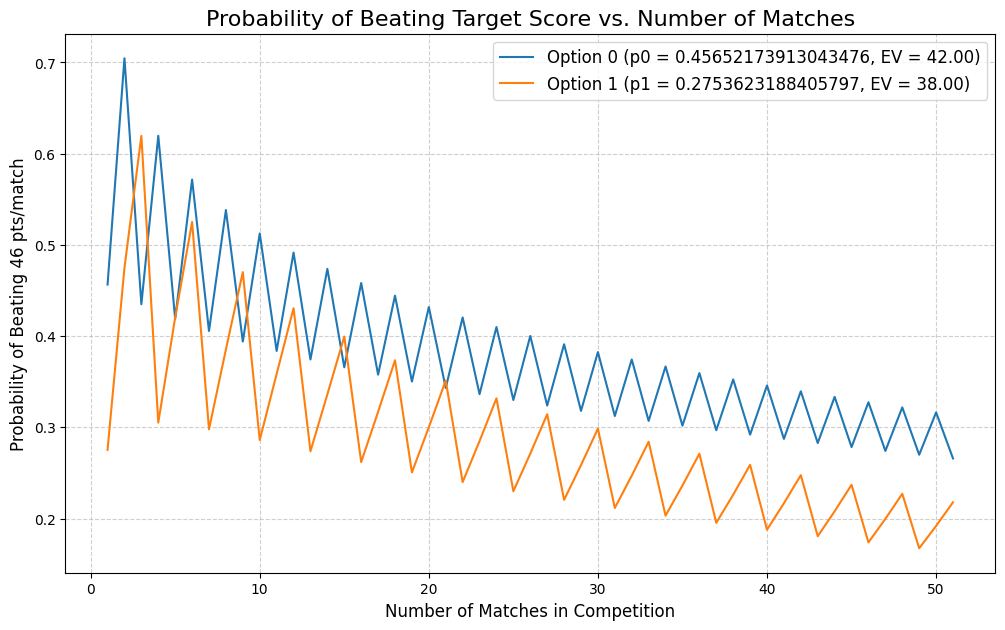

In [ ]:
# --- Plotting --- 
plt.figure(figsize=(12, 7))
plt.plot(match_nb_array, proba_win_0, label=f"Option 0 (p0 = {p0:.2f}, EV = {get_ev(p0, g0):.2f})")
plt.plot(match_nb_array, proba_win_1, label=f"Option 1 (p1 = {p1:.2f}, EV = {get_ev(p1, g1):.2f})")

plt.title('Probability of Beating Target Score vs. Number of Matches', fontsize=16)
plt.xlabel('Number of Matches in Competition', fontsize=12)
plt.ylabel(f'Probability of Beating {obj_pts_per_match} pts/match', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()